In [1]:
from google.colab import files

uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


In [2]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("Total rows and columns:", df.shape)
print("Columns:", df.columns.tolist())
df.isnull().sum()

Total rows and columns: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


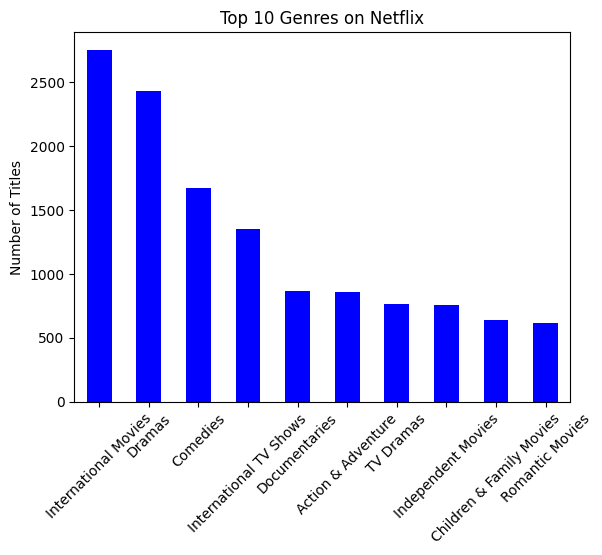

In [5]:
genres = df['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts().head(10)
import matplotlib.pyplot as plt
genre_counts.plot(kind='bar', title='Top 10 Genres on Netflix', color='blue')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

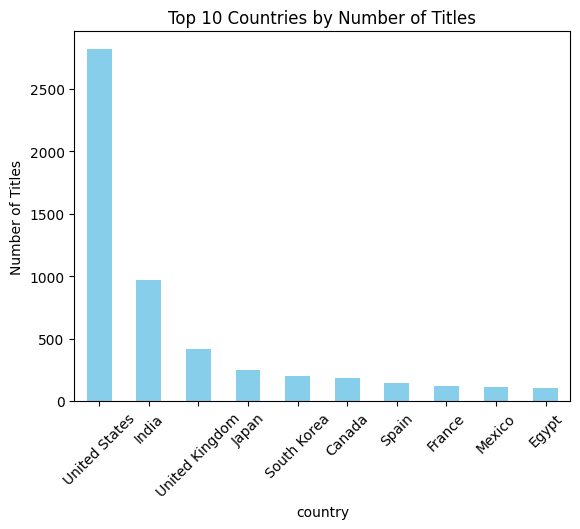

In [6]:
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='bar', title='Top 10 Countries by Number of Titles', color='skyblue')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

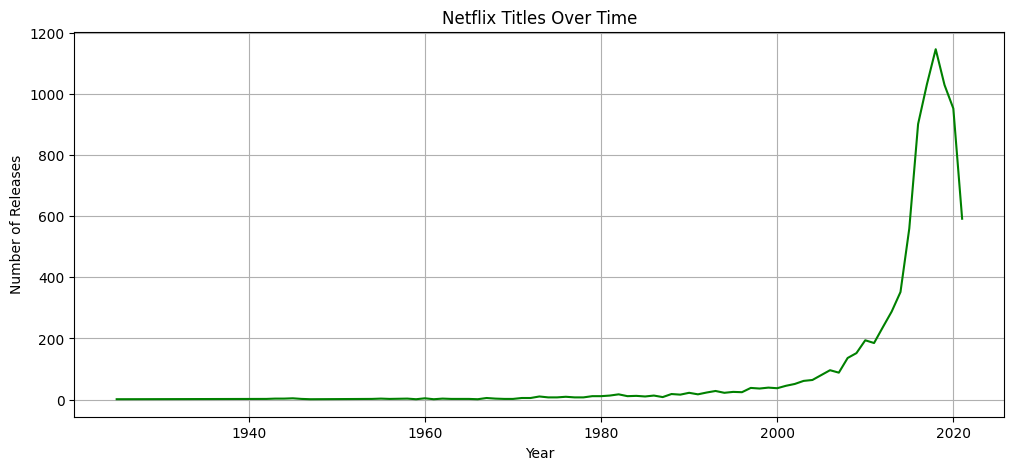

In [7]:
df = df.dropna(subset=['release_year'])
df['release_year'] = df['release_year'].astype(int)
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,5), title="Netflix Titles Over Time", color='green')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

In [8]:
indian_movies = df[(df['type'] == 'Movie') & (df['country'] == 'India')]
indian_movies[['title', 'release_year']].head()
recent_shows = df[(df['type'] == 'TV Show') & (df['release_year'] > 2018)]
recent_shows[['title', 'release_year']].head()

,title,release_year
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021
5,Midnight Mass,2021
